In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_images = []
labels = []
dir = "/content/drive/MyDrive/Colab Notebooks/Dataset_vehicle"
for label_name in os.listdir(dir):
  label_dir = os.path.join(dir, label_name)
  for data_name in os.listdir(label_dir):
    data_path = os.path.join(label_dir, data_name)
    data = cv2.imread(data_path, 0) #grayscale colors

    data = cv2.resize(data, (64,64), interpolation=cv2.INTER_AREA) #resize all images, INTER_AREA is for downscaling
    data_images.append(data.flatten()) #return one dimensional array
    labels.append(label_name)
data_images = np.array(data_images)
labels = np.array(labels)

xtrain, xtest, ytrain, ytest = train_test_split(data_images, labels, test_size=0.4, random_state=1)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

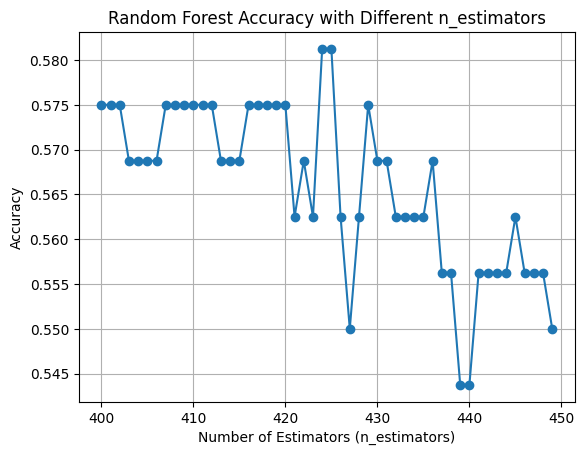

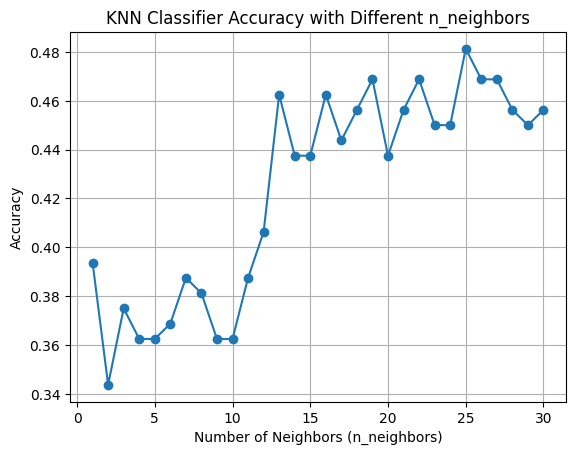

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier
Accuracy: 0.58125
Classification Report:
              precision    recall  f1-score   support

         Bus       0.57      0.75      0.65        36
         Car       0.70      0.46      0.56        41
       Truck       0.49      0.44      0.46        43
  motorcycle       0.60      0.70      0.64        40

    accuracy                           0.58       160
   macro avg       0.59      0.59      0.58       160
weighted avg       0.59      0.58      0.58       160

KNN Classifier
Accuracy: 0.48125
Classification Report:
              precision    recall  f1-score   support

         Bus       0.38      0.83      0.52        36
         Car       0.85      0.27      0.41        41
       Truck       0.56      0.23      0.33        43
  motorcycle       0.53      0.65      0.58        40

    accuracy                           0.48       160
   macro avg       0.58      0.50      0.46       160
weighted avg       0.58      0.48      0.45       160

Logistic

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt



# Random Forest Classifier
n_estimators_values = list(range(400, 450))

rf_accuracies = []
for n_estimators in n_estimators_values:

    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=20, random_state=1)
    rf.fit(xtrain, ytrain)

    rf_predict = rf.predict(xtest)

    rf_acc = accuracy_score(ytest, rf_predict)
    rf_accuracies.append(rf_acc)

plt.plot(n_estimators_values, rf_accuracies, marker='o')
plt.title('Random Forest Accuracy with Different n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

rf = RandomForestClassifier(n_estimators=425, max_depth=20, random_state=1)
rf.fit(xtrain, ytrain)
rf_predict = rf.predict(xtest)


# KNN Classifier
n_neighbors_values = list(range(1, 31))
knn_accuracies = []

for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(xtrain, ytrain)

    knn_predict = knn.predict(xtest)

    knn_acc = accuracy_score(ytest, knn_predict)
    knn_accuracies.append(knn_acc)

plt.plot(n_neighbors_values, knn_accuracies, marker='o')
plt.title('KNN Classifier Accuracy with Different n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(xtrain, ytrain)
knn_predict = knn.predict(xtest)


# Logistic Regression
logreg = LogisticRegression(random_state=1)
logreg.fit(xtrain, ytrain)
logreg_predict = logreg.predict(xtest)

# Artificial Neural Network Classifier
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=1)
ann.fit(xtrain, ytrain)
ann_predict = ann.predict(xtest)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(xtrain, ytrain)
nb_predict = nb.predict(xtest)


rf_acc = accuracy_score(ytest, rf_predict)
rf_report = classification_report(ytest, rf_predict)

knn_acc = accuracy_score(ytest, knn_predict)
knn_report = classification_report(ytest, knn_predict)


logreg_acc = accuracy_score(ytest, logreg_predict)
logreg_report = classification_report(ytest, logreg_predict)

ann_acc = accuracy_score(ytest, ann_predict)
ann_report = classification_report(ytest, ann_predict)

nb_acc = accuracy_score(ytest, nb_predict)
nb_report = classification_report(ytest, nb_predict)


print("Random Forest Classifier")
print("Accuracy:", rf_acc)
print("Classification Report:")
print(rf_report)
print("================================================================================")
print("KNN Classifier")
print("Accuracy:", knn_acc)
print("Classification Report:")
print(knn_report)
print("================================================================================")
print("Logistic Regression")
print("Accuracy:", logreg_acc)
print("Classification Report:")
print(logreg_report)
print("Artificial Neural Network Classifier")
print("Accuracy:", ann_acc)
print("Classification Report:")
print(ann_report)
print("================================================================================")
print("Naive Bayes Classifier")
print("Accuracy:", nb_acc)
print("Classification Report:")
print(nb_report)
print("================================================================================")

In [ ]:
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the image
image_path = "/content/drive/MyDrive/Colab Notebooks/input_image_DatasetVehicle/vehicle5.jpg"
input_image = cv2.imread(image_path, 0)  # Read the image in grayscale

# Preprocess the input image
input_image = cv2.resize(input_image, (64, 64), interpolation=cv2.INTER_AREA)
input_data = input_image.flatten().reshape(1, -1)

# Standardize the input data using the same scaler used for training
input_data = scaler.transform(input_data)

# Make predictions using the trained models
rf_prediction = rf.predict(input_data)
knn_prediction = knn.predict(input_data)
logreg_prediction = logreg.predict(input_data)
ann_prediction = ann.predict(input_data)
nb_prediction = nb.predict(input_data)

# Display the predictions
print("Random Forest Prediction:", rf_prediction[0])
print("KNN Prediction:", knn_prediction[0])
print("Logistic Regression Prediction:", logreg_prediction[0])
print("Artificial Neural Network Prediction:", ann_prediction[0])
print("Naive Bayes Prediction:", nb_prediction[0])

predictions = [rf_prediction[0], knn_prediction[0], logreg_prediction[0], ann_prediction[0], nb_prediction[0]]
total = {}

#hitung total setiap nilai dalam list
for nilai in predictions:
    if nilai in total:
        total[nilai] += 1
    else:
        total[nilai] = 1

print("\nTotal setiap nilai:", total)


nilai_terbanyak = None
total_terbanyak = 0

#cek nilai terbanyak
for nilai, total_value in total.items():
    if total_value > total_terbanyak:
        nilai_terbanyak = nilai
        total_terbanyak = total_value

print("\nNilai yang paling banyak muncul:", nilai_terbanyak)

biaya = 0
if nilai_terbanyak == 'Bus':
    biaya = 20000
elif nilai_terbanyak == 'Truck':
    biaya = 20000
elif nilai_terbanyak == 'Car':
    biaya = 8000
else:
    biaya = 3000

if biaya == 0:
    print("Keterangan: Dilarang Parkir")
else:
    print("Biaya:", biaya)